# Stock Market Analysis

A stock market, equity market, or share market is the aggregation of buyers and sellers of stocks (also called shares), which represent ownership claims on businesses; these may include securities listed on a public stock exchange, as well as stock that is only traded privately, such as shares of private companies which are sold to investors through equity crowdfunding platforms. Investment is usually made with an investment strategy in mind.

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import os
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [40]:
artifacts = "images"
if os.path.exists(artifacts):
    pass
else:
    os.makedirs(artifacts)

In [5]:
data = pd.read_csv('./s_p_stock/all_stocks_5yr.csv')

In [6]:
data.shape

(619040, 7)

In [7]:
data.head(6)

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
5,2013-02-15,13.93,14.61,13.93,14.50,15628000,AAL


In [8]:
data['date'] = pd.to_datetime(data['date'])

In [9]:
data[data['Name'] == 'GOOGL']['Name'].shape

(1259,)

In [10]:
google = data[data['Name']== 'GOOGL'].reset_index()

In [11]:
apple = data[data['Name'] == 'AAPL'].reset_index()
facebook = data[data['Name'] == 'FB'].reset_index()

In [12]:
amd = data[data['Name'] == 'AMD'].reset_index()

In [13]:
amd.shape

(1259, 8)

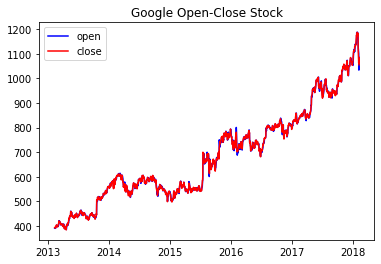

In [43]:
plt.plot(google['date'],google['open'],color="blue",label="open")
plt.plot(google['date'],google['close'],color="red",label="close")
plt.title("Google Open-Close Stock")
plt.legend()
plt.savefig("images/google_open_close.jpg")

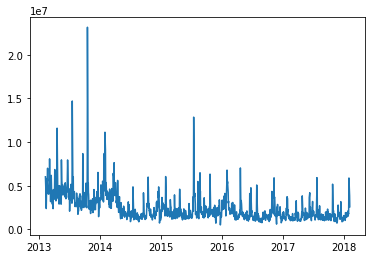

In [44]:
plt.plot(google['date'],google['volume'])
plt.savefig("images/google_volume.jpg")

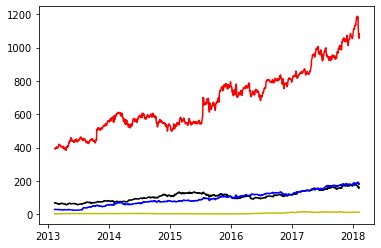

In [16]:
plt.plot(apple['date'],apple['close'],c="k")
plt.plot(facebook['date'],facebook['close'],c="b")
plt.plot(google['date'],google['close'],c="r")
plt.plot(amd['date'],amd['close'],c="y")

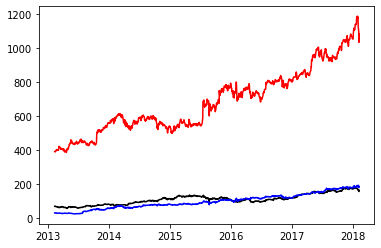

In [17]:
plt.plot(apple['date'],apple['open'],c="k")
plt.plot(facebook['date'],facebook['open'],c="b")
plt.plot(google['date'],google['open'],c="r")

In [18]:
data['close'].pct_change()

0              NaN
1        -0.019661
2        -0.013140
3         0.027330
4        -0.045703
            ...   
619035    0.014206
619036   -0.013364
619037   -0.038421
619038   -0.007585
619039    0.008052
Name: close, Length: 619040, dtype: float64

## Check the Top Stocks

In [19]:
data.sample(10)

,date,open,high,low,close,volume,Name
7939,2014-08-20,80.32,80.49,79.8800,80.40,1214461,ACN
115061,2016-02-17,1.94,1.99,1.8500,1.88,35943973,CHK
243101,2014-06-26,26.46,26.46,26.2000,26.29,23166624,GE
542450,2015-07-06,34.82,35.02,33.9400,34.09,4708899,TPR
438211,2015-10-05,52.54,54.51,52.0100,54.25,2822675,PCAR
352528,2013-07-03,25.90,26.14,25.7300,25.75,865343,LUK
263410,2016-04-08,78.84,79.20,77.5000,78.76,982367,HAS
71282,2016-10-18,759.00,759.00,753.3176,753.80,242648,AZO
508796,2015-05-19,121.70,121.81,120.2000,120.37,903789,SLG
13280,2015-11-04,87.16,87.39,86.8300,86.96,1594059,ADP


In [20]:
companies = ['AAPL','AMD','FB','GOOGL','AMZN','NVDA','EBAY','CSCO','IBM']

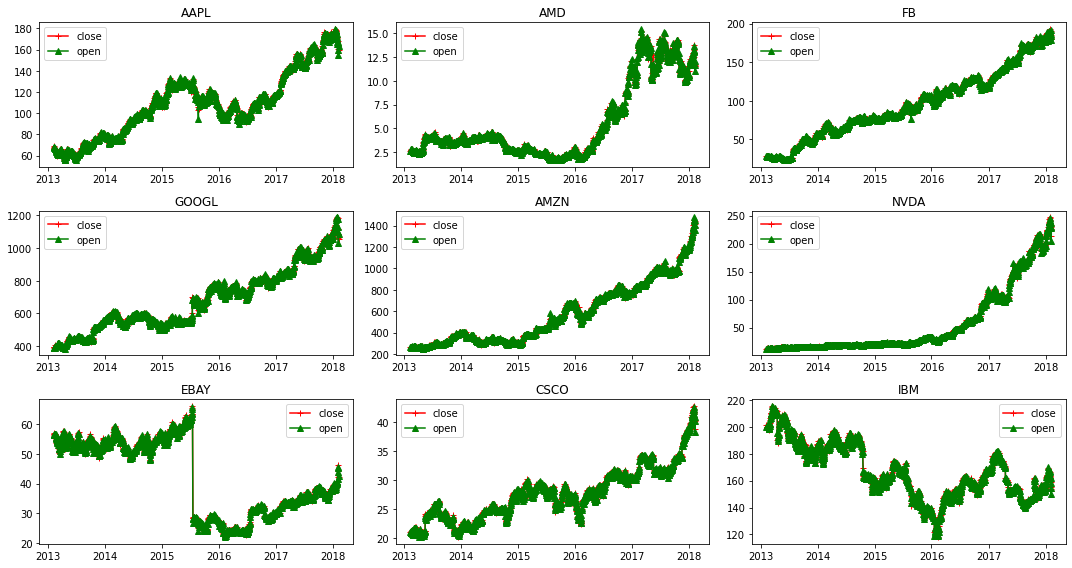

In [45]:
plt.figure(figsize=(15,8))
for index,company in enumerate(companies,1):
    plt.subplot(3,3,index)
    c = data[data['Name'] == company]
    plt.plot(c['date'],c['close'],c="r",label="close",marker="+")
    plt.plot(c['date'],c['open'],c="g",label="open",marker="^")
    plt.title(company)
    plt.legend()
    plt.tight_layout()
plt.savefig("images/companies_open_close.jpg")

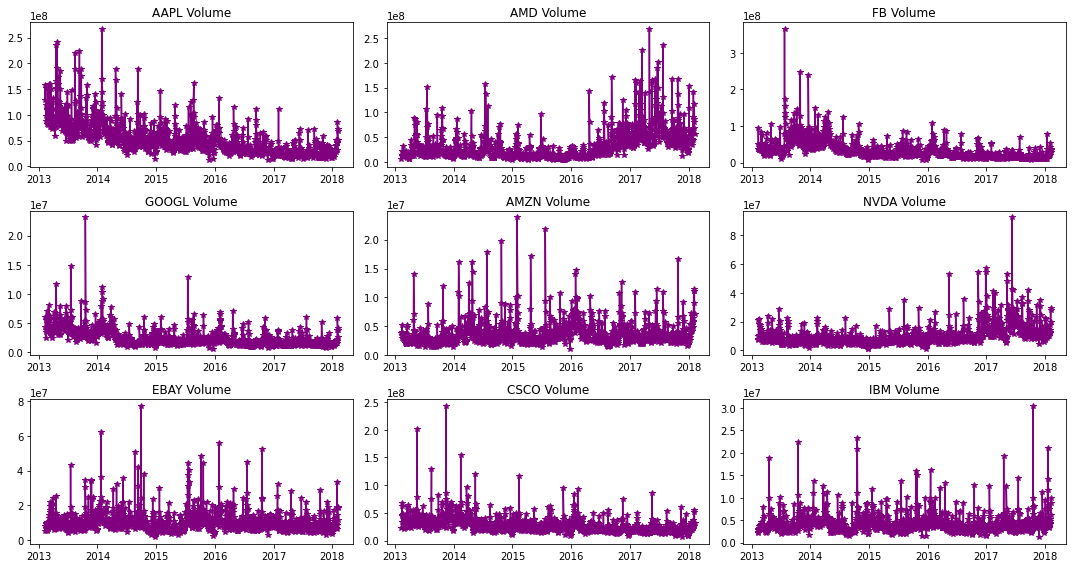

In [46]:
plt.figure(figsize=(15,8))
for index,company in enumerate(companies,1):
    plt.subplot(3,3,index)
    c = data[data['Name'] == company]
    plt.plot(c['date'],c['volume'],c='purple',marker='*')
    plt.title(f"{company} Volume")
    plt.tight_layout()
plt.savefig("images/companies_volume.jpg")

In [47]:
ma_day = [10, 20, 50]

l = []
for company in companies:
    df = data[data['Name'] == company]
    for ma in ma_day:
        column_name = f"MA for {ma} days"
        df[column_name] = df['close'].rolling(ma).mean()
    l.append(df)

In [48]:
days_df = pd.DataFrame(l[0])

In [49]:
for i in l[1:]:
    days_df = pd.concat([days_df,i],axis=0)

In [50]:
days_df.reset_index(inplace=True)

In [51]:
days_df.drop('index',inplace=True,axis=1)

In [52]:
days_df['date'] = pd.to_datetime(days_df['date'])

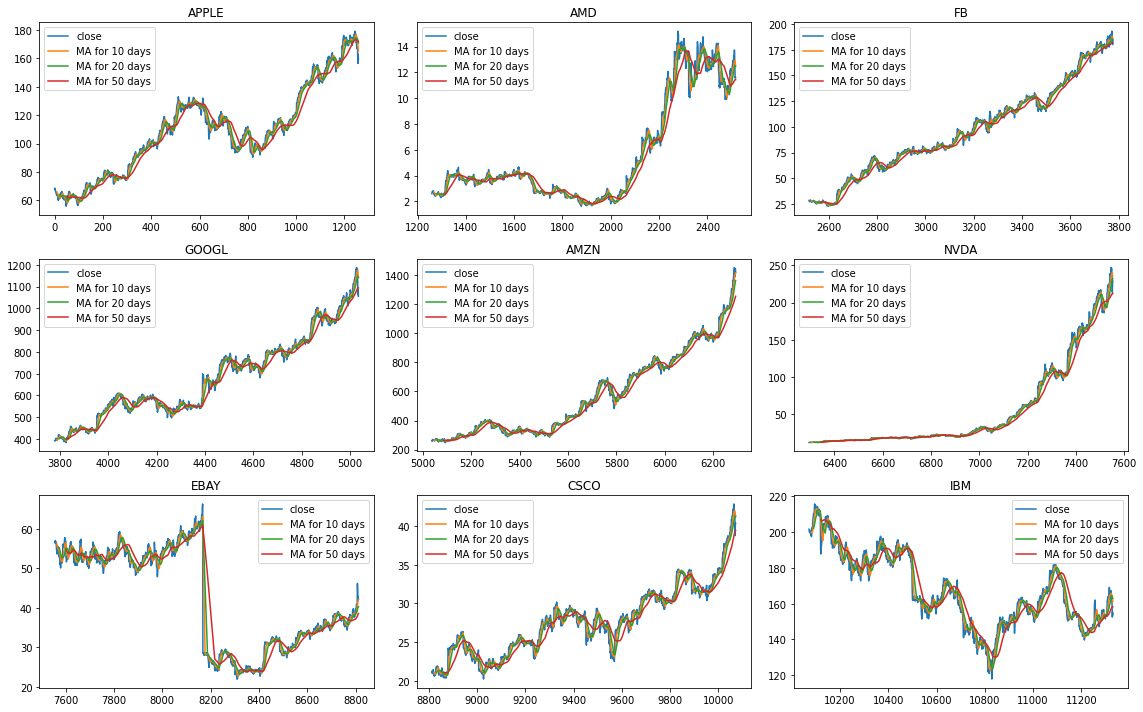

In [53]:
fig, axes = plt.subplots(nrows=3, ncols=3)
fig.set_figheight(10)
fig.set_figwidth(16)

days_df[days_df['Name'] == 'AAPL'][['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

days_df[days_df['Name'] == 'AMD'][['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('AMD')

days_df[days_df['Name'] == 'FB'][['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,2])
axes[0,2].set_title('FB')

days_df[days_df['Name'] == 'GOOGL'][['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('GOOGL')

days_df[days_df['Name'] == 'AMZN'][['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMZN')

days_df[days_df['Name'] == 'NVDA'][['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,2])
axes[1,2].set_title('NVDA')

days_df[days_df['Name'] == 'EBAY'][['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,0])
axes[2,0].set_title('EBAY')

days_df[days_df['Name'] == 'CSCO'][['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,1])
axes[2,1].set_title('CSCO')

days_df[days_df['Name'] == 'IBM'][['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,2])
axes[2,2].set_title('IBM')

fig.tight_layout()

In [33]:
days_df.corr()

,open,high,low,close,volume,MA for 10 days,MA for 20 days,MA for 50 days
open,1.000000,0.999955,0.999935,0.999896,-0.347034,0.999609,0.999158,0.997810
high,0.999955,1.000000,0.999918,0.999946,-0.346660,0.999597,0.999143,0.997787
low,0.999935,0.999918,1.000000,0.999954,-0.347582,0.999544,0.999089,0.997747
close,0.999896,0.999946,0.999954,1.000000,-0.347141,0.999541,0.999087,0.997743
volume,-0.347034,-0.346660,-0.347582,-0.347141,1.000000,-0.348319,-0.349996,-0.354152
MA for 10 days,0.999609,0.999597,0.999544,0.999541,-0.348319,1.000000,0.999763,0.998563
MA for 20 days,0.999158,0.999143,0.999089,0.999087,-0.349996,0.999763,1.000000,0.999215
MA for 50 days,0.997810,0.997787,0.997747,0.997743,-0.354152,0.998563,0.999215,1.000000


In [59]:
apple = data[data['Name'] == 'AAPL']

In [75]:
prediction_range = apple.loc[(apple['date'] > datetime(2015,1,1)) & (apple['date']<datetime(2020,1,1))]

In [76]:
prediction_range['close']

1737    109.33
1738    106.25
1739    106.26
1740    107.75
1741    111.89
         ...  
2513    167.78
2514    160.50
2515    156.49
2516    163.03
2517    159.54
Name: close, Length: 781, dtype: float64

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [99]:
mms = MinMaxScaler()

In [100]:
data = mms.fit_transform(apple['close'].values.reshape(-1,1))

In [101]:
len(data)

1259

In [119]:
prediction_days = 60

x_train = []
y_train = []

for x in range(prediction_days, len(data)):
    x_train.append(data[x - prediction_days:x, 0])
    y_train.append(data[x, 0])

In [120]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [121]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [122]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units = 64,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(keras.layers.LSTM(units= 64))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))

In [123]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 64)            16896     
                                                                 
 lstm_5 (LSTM)               (None, 64)                33024     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 52,033
Trainable params: 52,033
Non-trainable params: 0
_________________________________________________________________


In [124]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [125]:
history = model.fit(x_train,y_train,epochs=10)

Epoch 1/10
38/38 [==============================] - 4s 34ms/step - loss: 0.0311
Epoch 2/10
38/38 [==============================] - 1s 33ms/step - loss: 0.0108
Epoch 3/10
38/38 [==============================] - 1s 34ms/step - loss: 0.0113
Epoch 4/10
38/38 [==============================] - 1s 34ms/step - loss: 0.0095
Epoch 5/10
38/38 [==============================] - 1s 34ms/step - loss: 0.0092
Epoch 6/10
38/38 [==============================] - 1s 35ms/step - loss: 0.0089
Epoch 7/10
38/38 [==============================] - 1s 38ms/step - loss: 0.0077
Epoch 8/10
38/38 [==============================] - 1s 39ms/step - loss: 0.0072
Epoch 9/10
38/38 [==============================] - 1s 38ms/step - loss: 0.0078
Epoch 10/10
38/38 [==============================] - 1s 37ms/step - loss: 0.0066
